In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import folium
from folium import plugins
plt.style.use('seaborn-darkgrid')

C:\Users\loren\Anaconda_file\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
##Put your Dataset here ====> 
bird = pd.read_csv('birds.csv', skipinitialspace=True, usecols=["common_name", "scientific_name","date","time","country",
                                                                "latitude", "longitude", "elevetaion", "gio_not",
                                                               "season","background","call", 'sex', 'stage', 'special' ] )

bird.loc[bird['common_name'] == '(?) Mallard', 'common_name'] = 'Mallard'
print('Training data shape: ', bird.shape)

Training data shape:  (1366, 15)


C:\Users\loren\Anaconda_file\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (8,11,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
bird.head(10)

,common_name,scientific_name,date,time,country,latitude,longitude,elevetaion,gio_not,season,background,call,sex,stage,special
0,Rufous-tailed Hummingbird,Amazilia tzacatl,2020-06-13,06:00,Colombia,4.3510,-74.6520,380,notte,0,NaN,song,NaN,NaN,NaN
1,Rufous-tailed Hummingbird,Amazilia tzacatl,2020-06-08,06:00,Colombia,4.3510,-74.6520,380,notte,0,NaN,song,NaN,NaN,NaN
2,Rufous-tailed Hummingbird,Amazilia tzacatl,2020-03-29,05:50,Colombia,4.3510,-74.6520,380,notte,0,NaN,song,NaN,NaN,NaN
3,Rufous-tailed Hummingbird,Amazilia tzacatl,2020-03-21,06:00,Colombia,4.3510,-74.6520,380,notte,0,NaN,song,NaN,NaN,NaN
4,Rufous-tailed Hummingbird,Amazilia tzacatl,2019-03-05,16:00,Belize,17.5390,-89.1111,140,notte,3,NaN,call,NaN,NaN,NaN
5,Rufous-tailed Hummingbird,Amazilia tzacatl,2019-07-13,16:30,Costa Rica,4.4611,-75.2151,1200,giorno,1,NaN,song,NaN,NaN,NaN
6,Rufous-tailed Hummingbird,Amazilia tzacatl ss tzacatl,2018-03-07,09:00,Costa Rica,NaN,NaN,1000 masl approx,NaN,2,NaN,call,NaN,NaN,NaN
7,Rufous-tailed Hummingbird,Amazilia tzacatl,2019-11-01,13:47,Ecuador,0.0797,-78.6838,1600,giorno,2,NaN,NaN,NaN,juvenile,NaN
8,Rufous-tailed Hummingbird,Amazilia tzacatl tzacatl,2015-12-14,05:48,Costa Rica,10.4560,-84.6600,360,notte,2,NaN,song,NaN,NaN,NaN
9,Rufous-tailed Hummingbird,Amazilia tzacatl,2020-06-23,18:19,Colombia,4.7964,-75.6899,1400,giorno,1,NaN,song,NaN,adult,NaN


In [4]:
count_species = bird['common_name'].value_counts()[0:10].to_dict()
list_of_count = list(count_species.values())

## Count Frequency for each species 

In [5]:
target = pd.read_csv('test_target.csv', header = None)
del target[0]

id_class = {}
for i in range(10):
    id_class[i] = bird['common_name'].unique()[i]
    
t = [id_class[x] for x in target[1]]
target['name'] = t

In [6]:
tve = target['name'].value_counts().to_dict()
list_of_count_target = list(tve.values())
list_of_true_name_target = list(tve.keys())

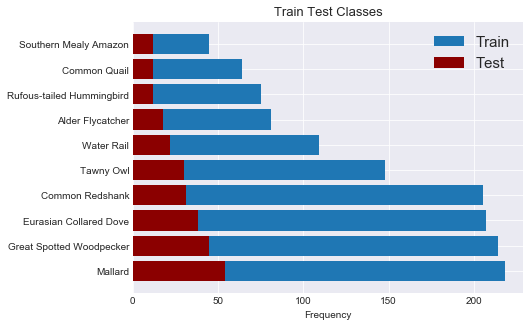

In [7]:
fig, ax = plt.subplots(figsize=(7,5))

ax.barh(list_of_true_name_target, list_of_count, label ='Train') 
ax.barh(list_of_true_name_target, list_of_count_target, label ='Test', color = 'darkred') 

ax.set_xlabel('Frequency', size = 10) 
ax.legend(prop={'size':15}) 
ax.set_title('Train Test Classes', size = 13) 
  
plt.show() 
fig.savefig('Train_Test_Class.png',dpi=150, bbox_inches = "tight")

### Plot on Folium 

In [8]:
bird2 = bird
bird2=bird2.dropna(subset=['longitude'])
bird2=bird2.dropna(subset=['latitude'])
bird2 = bird2.reset_index(drop=True)

In [9]:
bird_map = folium.Map([0, 0], zoom_start=2)
days = plugins.MarkerCluster(name='Day', overlay = True, control = True).add_to(bird_map)
nights = plugins.MarkerCluster(name='Night',  overlay = True, control = True).add_to(bird_map)

In [10]:
for i in range(len(bird2)):
    lat = bird2.loc[i][5]
    lon = bird2.loc[i][6]
    name = bird2.loc[i][1]
    spec = bird2.loc[i][0]
    day = bird2.loc[i][8] 
    full_name = 'SPECIES: '+spec+' NAME: '+name
    if day == 'giorno':
        
        folium.Marker([lat, lon], popup= full_name, icon = folium.Icon(color='blue')).add_to(days)
        
    else:
        folium.Marker([lat, lon], popup= full_name, icon = folium.Icon(color='black')).add_to(nights)

folium.LayerControl().add_to(bird_map)

In [11]:
bird_map.save('Birds_Map.html')

In [12]:
bird_map